In [1]:
import dask

dask.config.set({"dataframe.query-planning": False})

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

import sys
sys.path.append("../../workflow/scripts/")
import readwrite
cfg = readwrite.config()

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)
/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/jbac/miniforge3/envs/spatial/lib/python3.11/site-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error a

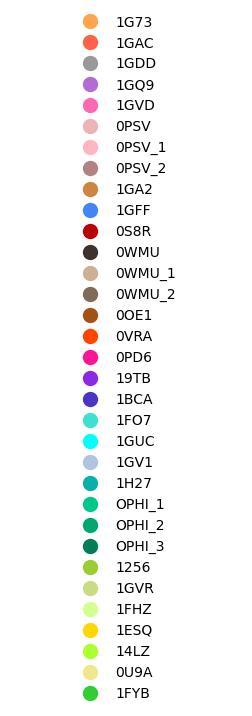

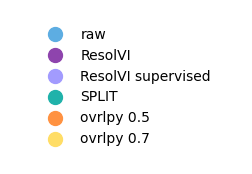

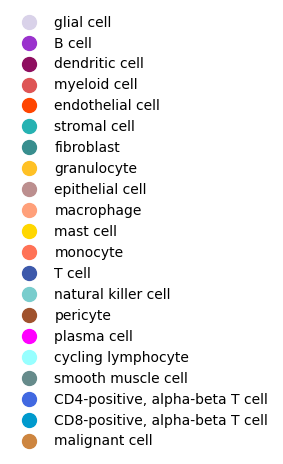

In [ ]:
output_folder = Path(cfg['figures_dir']) / 'palettes'
palettes_dir = cfg['xenium_metadata_dir']
cell_type_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_cell_types_combo.csv')
sample_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_sample.csv')
count_correction_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_correction_method.csv')


dpi = 300

for color in ['sample', 'count_correction', 'Level2.1']:

    if color == "sample":
        palette_file = sample_palette
        palette = pd.read_csv(palette_file, index_col=0).iloc[:, 0]
    elif color == "count_correction":
        palette_file = count_correction_palette
        palette = pd.read_csv(palette_file, index_col=0).iloc[:, 0]
    else:
        if color == "Level2.1":
            palette_file = cell_type_palette
            
            palette_lvl2 = pd.read_csv(cell_type_palette)[["Level2", "cols_Level2"]]
            palette_lvl2 = palette_lvl2.drop_duplicates().set_index("Level2").squeeze()

            palette = pd.read_csv(cell_type_palette)[[color, f"cols_{color}"]].drop_duplicates().set_index(color).squeeze()
            palette = palette[~palette.index.str.contains("malignant")]
            for k, v in palette_lvl2.items():
                if k not in palette.index:
                    palette[k] = palette_lvl2[k]
            palette = palette.reset_index().replace(r" of .+", "", regex=True).drop_duplicates().set_index(color).squeeze()

        else:
            palette = pd.read_csv(cell_type_palette)[[color, f"cols_{color}"]].drop_duplicates().set_index(color).squeeze()


    output_file = output_folder / f"{palette_file.stem}_{color}_legend.png"  # Save as PNG for better quality

    # Create circular legend handles
    # handles = [mlines.Line2D([], [], color=v, marker='o', linestyle='None',
    #                         markersize=10, label=k) for k,v in palette.items()]

    # Create square legend handles
    handles = [mlines.Line2D([], [], color=v, marker='s', linestyle='None',
                         markersize=10, label=k) for k, v in palette.items()]

    # Create a figure and axis for the legend
    fig, ax = plt.subplots(figsize=(3, 2))  # Adjust figure size as needed
    ax.legend(handles=handles, loc='center', frameon=False)
    ax.axis('off')  # Hide axes

    # Save the legend
    output_file.parents[0].mkdir(parents=True, exist_ok=True)

    plt.savefig(output_file, bbox_inches='tight',dpi=dpi)  # Use bbox_inches='tight' to prevent labels from being cut off
    plt.show()  # Close the figure to free memory

In [8]:
output_folder = Path(cfg['figures_dir']) / 'palettes'
palettes_dir = cfg['xenium_metadata_dir'] # This seems unused, but kept from original
panel_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_panel.csv')
sample_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_sample.csv')
count_correction_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_correction_method.csv')
spot_class_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_spot_class.csv')
cell_type_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_cell_types_combo.csv')


dpi = 300
output_folder.mkdir(parents=True, exist_ok=True) # Create output dir once

for color in ['panel', 'sample', 'count_correction', 'spot_class', 'Level2.1']:

    palette = None # Initialize palette
    palette_file = None # Initialize palette_file

    if color in ["panel", "sample", "count_correction", "spot_class"]:
        if color == "panel":
            palette_file = panel_palette
        if color == "sample":
            palette_file = sample_palette
        elif color == "count_correction":
            palette_file = count_correction_palette
        elif color == "spot_class":
            palette_file = spot_class_palette

        if palette_file.exists():
            palette = pd.read_csv(palette_file, index_col=0).iloc[:, 0]

    elif color == "Level2.1":
        palette_file = cell_type_palette
        if palette_file.exists():
            palette_df = pd.read_csv(cell_type_palette)

            palette_lvl2 = palette_df[["Level2", "cols_Level2"]]
            palette_lvl2 = palette_lvl2.drop_duplicates().set_index("Level2").squeeze()

            palette = palette_df[[color, f"cols_{color}"]].drop_duplicates().set_index(color).squeeze()
            palette = palette[~palette.index.astype(str).str.contains("malignant")] 

            for k, v in palette_lvl2.items():
                if k not in palette.index:
                    palette.loc[k] = palette_lvl2[k]

            palette = palette.reset_index()
            palette[color] = palette[color].astype(str).replace(r" of .+", "", regex=True) 
            palette = palette.drop_duplicates().set_index(color).squeeze()
    else:
         # General case if more colors are added later, assuming structure consistency
         palette_file = cell_type_palette
         if palette_file.exists() and color in pd.read_csv(palette_file).columns:
            palette = pd.read_csv(cell_type_palette)[[color, f"cols_{color}"]].drop_duplicates().set_index(color).squeeze()


    if palette is None or palette.empty:
        print(f"Warning: Palette for '{color}' could not be loaded or is empty. Skipping.")
        continue
    if palette_file is None:
        print(f"Warning: palette_file not set for '{color}'. Skipping.")
        continue

    # Create square legend handles
    handles = [mlines.Line2D([], [], color=v, marker='s', linestyle='None',
                         markersize=10, label=k) for k, v in palette.items()]

    # --- VERTICAL LEGEND ---
    output_file_v = output_folder / f"{palette_file.stem}_{color}_legend_vertical.png"
    fig_v, ax_v = plt.subplots(figsize=(3, max(2, len(handles) * 0.3))) # Adjust height slightly based on items
    ax_v.legend(handles=handles, loc='center', frameon=False)
    ax_v.axis('off')
    plt.savefig(output_file_v, bbox_inches='tight', dpi=dpi)
    plt.close(fig_v) # Close the figure


    # --- HORIZONTAL LEGEND (3 ROWS) ---
    output_file_h = output_folder / f"{palette_file.stem}_{color}_legend_horizontal.png"
    num_items = len(handles)
    # Calculate number of columns needed to approximate 4 rows
    ncols = np.ceil(num_items / 4)
    # Adjust figure size - width based on columns, height fixed or slightly adjusted
    fig_h, ax_h = plt.subplots(figsize=(max(4, ncols * 1.5), 4)) # Adjust width based on cols, fixed height
    ax_h.legend(handles=handles, loc='center', frameon=False, ncol=ncols)
    ax_h.axis('off')
    plt.savefig(output_file_h, bbox_inches='tight', dpi=dpi)
    plt.close(fig_h) # Close the figure

print("Finished generating legends.")

Finished generating legends.
